Purpose of the Analysis
1. To classify participants into Good Knowledge and Poor Knowledge and consequently assess statistical significance with sociodemographic variables
2. To classify participants into Positive Attitude and Negative Attitude and consequently assess statistical significance with sociodemographic variables

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from statsmodels.stats import weightstats
import scipy.stats as stats
pd.options.mode.chained_assignment = None  # Disable SettingWithCopyWarning

In [2]:
df=pd.read_csv('New_Hepatitis.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df.shape

(422, 43)

In [7]:
#Knowledge Coding
#KNOWLEDGE ON HEPATITIS B VIRUS INFECTION
df['A'] = df['A'].apply(lambda x: 1 if x=='No' else 0 if x=='Yes' else None)
df['B'] = df['B'].apply(lambda x: 1 if x=='Yes' else 0 if x=='No' else None)
df['C'] = df['C'].apply(lambda x: 1 if x=='No' else 0 if x=='Yes' else None)
df['D'] = df['D'].apply(lambda x: 1 if x=='No' else 0 if x=='Yes' else None)
df['E'] = df['E'].apply(lambda x: 1 if x=='No' else 0 if x=='Yes' else None)
df['F'] = df['F'].apply(lambda x: 1 if x=='Yes' else 0 if x=='No' else None)
df['G'] = df['G'].apply(lambda x: 1 if x=='No' else 0 if x=='Yes' else None)
df['H'] = df['H'].apply(lambda x: 1 if x=='Yes' else 0 if x=='No' else None)
df['I'] = df['I'].apply(lambda x: 1 if x=='No' else 0 if x=='Yes' else None)
df['J'] = df['J'].apply(lambda x: 1 if x=='Yes' else 0 if x=='No' else None)
df['K'] = df['K'].apply(lambda x: 1 if x=='Yes' else 0 if x=='No' else None)
df['L'] = df['L'].apply(lambda x: 1 if x=='Yes' else 0 if x=='No' else None)
df['M'] = df['M'].apply(lambda x: 1 if x=='No' else 0 if x=='Yes' else None)
df['N'] = df['N'].apply(lambda x: 1 if x=='No' else 0 if x=='Yes' else None)
df['O'] = df['O'].apply(lambda x: 1 if x=='Yes' else 0 if x=='No' else None)

df['P'] = df['P'].apply(lambda x: 1 if x=='Yes' else 0 if x=='No' else None)
df['Q'] = df['Q'].apply(lambda x: 1 if x=='No' else 0 if x=='Yes' else None)
df['R'] = df['R'].apply(lambda x: 1 if x=='Yes' else 0 if x=='No' else None)
df['S'] = df['S'].apply(lambda x: 1 if x=='No' else 0 if x=='Yes' else None)   
df['T'] = df['T'].apply(lambda x: 1 if x=='No' else 0 if x=='Yes' else None)   
df['U'] = df['U'].apply(lambda x: 1 if x=='Yes' else 0 if x=='No' else None)   
df['V'] = df['V'].apply(lambda x: 1 if x=='No' else 0 if x=='Yes' else None)   
df['W'] = df['W'].apply(lambda x: 1 if x=='No' else 0 if x=='Yes' else None)   
df['X'] = df['X'].apply(lambda x: 1 if x=='No' else 0 if x=='Yes' else None)   

In [5]:
df['AK'].value_counts()

AK
Strongly Agree       228
Agree                136
Don't Know            25
Strongly Disagree     12
Disagree               9
Name: count, dtype: int64

In [6]:
#Replace and Score the Attitudes
df['AA'] = df['AA'].replace('Strongly Disagree', 'Disagree')
df['AA'] = df['AA'].apply(lambda x: 1 if x=='Disagree' else 0)

df['AB'] = df['AB'].replace('Strongly Disagree', 'Disagree')
df['AB'] = df['AB'].apply(lambda x: 1 if x=='Disagree' else 0)

df['AC'] = df['AC'].replace('Strongly Disagree', 'Disagree')
df['AC'] = df['AC'].apply(lambda x: 1 if x=='Disagree' else 0)

df['AD'] = df['AD'].replace('Strongly Agree', 'Agree')
df['AD'] = df['AD'].apply(lambda x: 1 if x=='Agree' else 0)

df['AE'] = df['AE'].replace('Strongly Disagree', 'Disagree')
df['AE'] = df['AE'].apply(lambda x: 1 if x=='Disagree' else 0)

df['AF'] = df['AF'].replace('Strongly Disagree', 'Disagree')
df['AF'] = df['AF'].apply(lambda x: 1 if x=='Disagree' else 0)

#df['AG'] = df['AG'].replace('Strongly Disagree', 'Disagree')
#df['AG'] = df['AG'].apply(lambda x: 1 if x=='Disagree' else 0)

#df['AH'] = df['AH'].replace('Strongly Disagree', 'Disagree')
#df['AH'] = df['AH'].apply(lambda x: 1 if x=='Disagree' else 0)

#df['AI'] = df['AI'].replace('Strongly Disagree', 'Disagree')
#df['AI'] = df['AI'].apply(lambda x: 1 if x=='Disagree' else 0)

df['AJ'] = df['AJ'].replace('Strongly Agree', 'Agree')
df['AJ'] = df['AJ'].apply(lambda x: 1 if x=='Agree' else 0)

df['AK'] = df['AK'].replace('Strongly Agree', 'Agree')
df['AK'] = df['AK'].apply(lambda x: 1 if x=='Agree' else 0)


In [7]:
#Drop columns that do not objectively assess Attitude
df.drop('AG', axis=1, inplace=True)
df.drop('AH', axis=1, inplace=True)
df.drop('AI', axis=1, inplace=True)

In [8]:
#Create Column for Total Knowledge
df['TotalKnow'] = df['A'] + df['B'] + df['C'] + df['D'] + df['E'] + df['F'] + df['G'] + df['H'] + df['I'] + df['J'] + df['K'] + df['L'] + df['M'] + df['N'] + df['O'] + df['P'] + df['Q'] + df['R'] + df['S']  + df['T'] + df['U'] + df['V'] + df['W'] + df['X']

#Create Column for Total Attitude
df['TotalAttit'] = df['AA'] + df['AB'] + df['AC'] + df['AD'] + df['AE'] + df['AF'] + df['AJ'] + df['AK']

array([[<Axes: title={'center': 'TotalKnow'}>]], dtype=object)

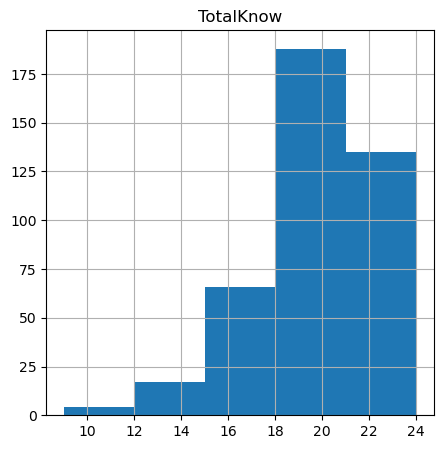

In [9]:
df.hist(column='TotalKnow',
       figsize=(5,5),
       bins=5)

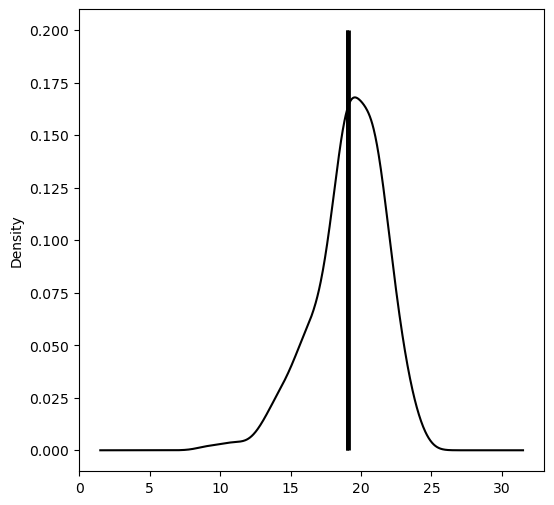

In [10]:
#Density plot for Total Knowledge
df['TotalKnow'].plot.density(figsize=(6,6),
                       color='black')

plt.vlines(df['TotalKnow'].mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=2.0,
          color='black');

plt.vlines(df['TotalKnow'].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2, 
           linewidth=2.0,
           color="black");

plt.vlines(df['TotalKnow'].mode(),   # Plot red line at median
           ymin=0, 
           ymax=0.2, 
           linewidth=2.0,
           color="black");


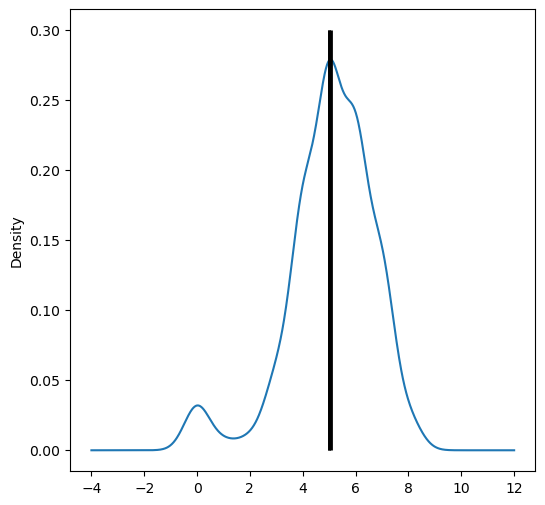

In [11]:
df['TotalAttit'].plot.density(figsize=(6,6))
plt.vlines(df['TotalAttit'].mean(),
           ymin=0,
           ymax=0.3,
          color='black',
          linewidth=2.0,)

plt.vlines(df['TotalAttit'].median(),
           ymin=0,
           ymax=0.3,
          color='black',
          linewidth=2.0,)

plt.vlines(df['TotalAttit'].mode(),
           ymin=0,
           ymax=0.3,
          color='black',
          linewidth=2.0,)


In [12]:
#Creat new categorical Columns of Good and Poor Knowledge and Good and Poor Attitude
df['KnowLevel'] = df['TotalKnow'].apply(lambda x: "Good Knowledge" if x >= 19 else "Poor Knowledge")

df['AttitLevel'] = df['TotalAttit'].apply(lambda x: "Positive Attitude" if x >= 5 else "Negative Attitude")



In [13]:
df['TotalAttit'].describe()

count    422.000000
mean       5.059242
std        1.619007
min        0.000000
25%        4.000000
50%        5.000000
75%        6.000000
max        8.000000
Name: TotalAttit, dtype: float64

In [14]:
df.head(1)

,Sex,Marital status,Department,Year of study(Year as at the middle of 2021),Age (in years),Religion,Geo-political zone in Nigeria (place of origin),Have you heard of Hepatitis B virus infection?,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,AA,AB,AC,AD,AE,AF,P,Q,R,S,T,U,V,W,X,AJ,AK,TotalKnow,TotalAttit,KnowLevel,AttitLevel
0,Female,Single,Nursing,400 level,22.0,Christianity,South West,Yes,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0,1,0,1,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1,1,19.0,5,Good Knowledge,Positive Attitude


In [15]:
df.head()

,Sex,Marital status,Department,Year of study(Year as at the middle of 2021),Age (in years),Religion,Geo-political zone in Nigeria (place of origin),Have you heard of Hepatitis B virus infection?,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,AA,AB,AC,AD,AE,AF,P,Q,R,S,T,U,V,W,X,AJ,AK,TotalKnow,TotalAttit,KnowLevel,AttitLevel
0,Female,Single,Nursing,400 level,22.0,Christianity,South West,Yes,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0,1,0,1,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1,1,19.0,5,Good Knowledge,Positive Attitude
1,Female,Single,Nursing,500 level,23.0,Christianity,South West,Yes,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1,0,1,0,1,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,14.0,5,Poor Knowledge,Positive Attitude
2,Female,Single,Nursing,400 level,23.0,Christianity,South West,Yes,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1,1,1,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1,1,19.0,6,Good Knowledge,Positive Attitude
3,Male,Single,Nursing,200 level,20.0,Christianity,North Central,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,0,Poor Knowledge,Negative Attitude
4,Female,Single,Nursing,500 level,25.0,Christianity,South East,Yes,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0,1,0,1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1,1,18.0,4,Poor Knowledge,Negative Attitude


In [16]:
df = df[df['Have you heard of Hepatitis B virus infection?'] != "No"]

In [36]:
#Create new column to make age column categorical
df['Age'] = df['Age (in years)'].apply(lambda x: "25 and above" if x >= 25 else "16-24")

In [37]:
#contigency tables for each categorical variable against level of knowledge
cat = pd.crosstab(index=df['Age'],
                 columns=df['AttitLevel'], margins = False)
print(cat)
chisquare = stats.chi2_contingency(cat)
print(chisquare)

AttitLevel    Negative Attitude  Positive Attitude
Age                                               
16-24                        92                237
25 and above                 23                 58
Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[ 92.2804878, 236.7195122],
       [ 22.7195122,  58.2804878]]))


In [35]:
df['Age'].value_counts()

Age
                329
25 and above     81
Name: count, dtype: int64

In [48]:
364/410

0.8878048780487805

In [21]:
df.head(1)

,Sex,Marital status,Department,Year of study(Year as at the middle of 2021),Age (in years),Religion,Geo-political zone in Nigeria (place of origin),Have you heard of Hepatitis B virus infection?,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,AA,AB,AC,AD,AE,AF,P,Q,R,S,T,U,V,W,X,AJ,AK,TotalKnow,TotalAttit,KnowLevel,AttitLevel,Age
0,Female,Single,Nursing,400 level,22.0,Christianity,South West,Yes,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0,1,0,1,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1,1,19.0,5,Good Knowledge,Positive Attitude,
